# Networks in Python

How other companies uses network:
- Google: page rank
- Uber: route optimization
- Amazon: supply chain optimization

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

# Undirected graph

An undirected graph is graph, i.e., a set of objects (called vertices or nodes) that are connected together, where all the edges are bidirectional. An undirected graph is sometimes called an undirected network. In contrast, a graph where the edges point in a direction is called a directed graph.

In [2]:
edgelist_df = pd.DataFrame(
    {
        "node1": [1, 1, 1, 2, 2, 3, 4, 4],
        "node2": [2, 3, 4, 4, 5, 5, 3, 5],
        "weights": [5, 2, 1, 3, 1, 7, 1, 4],
    }
)
edgelist_df

,node1,node2,weights
0,1,2,5
1,1,3,2
2,1,4,1
3,2,4,3
4,2,5,1
5,3,5,7
6,4,3,1
7,4,5,4


In [3]:
# Create an empty graph.
g = nx.Graph()

# itertuples is more performant than iterrows.
for row in edgelist_df.itertuples():
    # Passing any key-value turns it into a custom attribute.
    # weight is a custom attribute.
    g.add_edge(row.node1, row.node2, weight=row.weights)
g.edges(data=True)

EdgeDataView([(1, 2, {'weight': 5}), (1, 3, {'weight': 2}), (1, 4, {'weight': 1}), (2, 4, {'weight': 3}), (2, 5, {'weight': 1}), (3, 5, {'weight': 7}), (3, 4, {'weight': 1}), (4, 5, {'weight': 4})])

In [4]:
# Nodes are automatically created, but without any information.
g.nodes(data=True)

NodeDataView({1: {}, 2: {}, 3: {}, 4: {}, 5: {}})

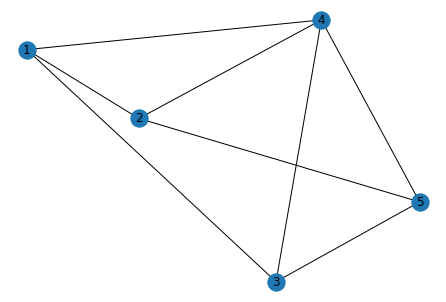

In [5]:
weights = nx.get_edge_attributes(g, "weight")

# By default, uses random_layout.
nx.draw(g, pos=nx.spring_layout(g), with_labels=True)

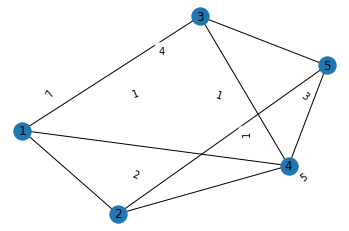

In [6]:
# Draw the edge labels (seems like this is the only way)
nx.draw_networkx_edge_labels(g, pos=nx.spring_layout(g), edge_labels=weights)
nx.draw(g, pos=nx.spring_layout(g), with_labels=True)

In [7]:
edgelist_df[edgelist_df["node1"] == 1]

,node1,node2,weights
0,1,2,5
1,1,3,2
2,1,4,1


In [8]:
# Adjacency matrix.
nx.linalg.graphmatrix.adj_matrix(g).toarray()

array([[0, 5, 2, 1, 0],
       [5, 0, 0, 3, 1],
       [2, 0, 0, 1, 7],
       [1, 3, 1, 0, 4],
       [0, 1, 7, 4, 0]])

In [9]:
# Incidence matrix.
# We have 8 edges as shown.
g.edges

EdgeView([(1, 2), (1, 3), (1, 4), (2, 4), (2, 5), (3, 5), (3, 4), (4, 5)])

In [10]:
# The relationship between 5 nodes and 8 edges is shown below.
# Every row is a node, and every column represents the edge. If the value is 1, it means the edge is present.
nx.linalg.graphmatrix.incidence_matrix(g).toarray()

array([[1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 1., 0., 1.]])

# Directed Graph

A directed graph has edges which are in a particular direction.

In [11]:
# col 0: from node, col 1: to node, col 2: weight
dict_of_dicts = {
    0: {1: {"weight": 4}, 3: {"weight": 4}, 4: {"weight": 2}},
    1: {0: {"weight": 4}, 2: {"weight": 9}, 4: {"weight": 1}},
    2: {
        3: {"weight": 4},
    },
    3: {
        1: {"weight": 8},
        4: {"weight": 7},
    },
}

G = nx.from_dict_of_dicts(dict_of_dicts, create_using=nx.DiGraph)
nx.write_weighted_edgelist(G, "edgelist.txt")

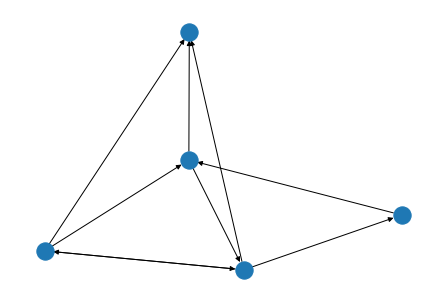

In [12]:
G1 = nx.read_weighted_edgelist("edgelist.txt", nodetype=str, create_using=nx.DiGraph())
nx.draw(G1)

In [13]:
G1.nodes(data=True)

NodeDataView({'0': {}, '1': {}, '3': {}, '4': {}, '2': {}})

In [14]:
G1.edges(data=True)

OutEdgeDataView([('0', '1', {'weight': 4.0}), ('0', '3', {'weight': 4.0}), ('0', '4', {'weight': 2.0}), ('1', '0', {'weight': 4.0}), ('1', '2', {'weight': 9.0}), ('1', '4', {'weight': 1.0}), ('3', '1', {'weight': 8.0}), ('3', '4', {'weight': 7.0}), ('2', '3', {'weight': 4.0})])

# Visualizing graph

Some useful visualization patterns
- spring layout: the length of edges is proportional to the weights
- circular layout: the nodes are present in a circle
- random layout

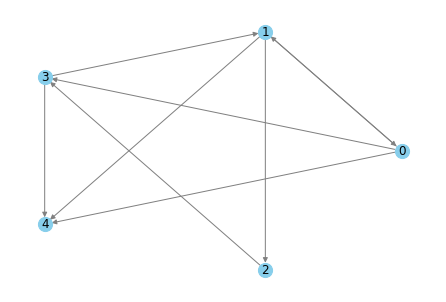

In [15]:
nx.draw_circular(
    G1, with_labels=True, node_color="skyblue", node_size=200, edge_color="grey"
)

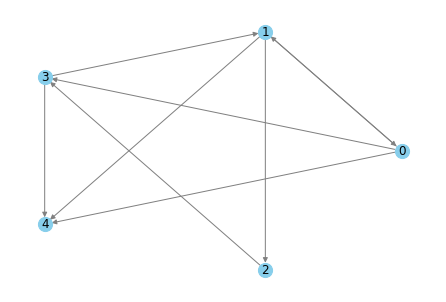

In [16]:
nx.draw(
    G1,
    pos=nx.circular_layout(G1),
    with_labels=True,
    node_color="skyblue",
    node_size=200,
    edge_color="grey",
)

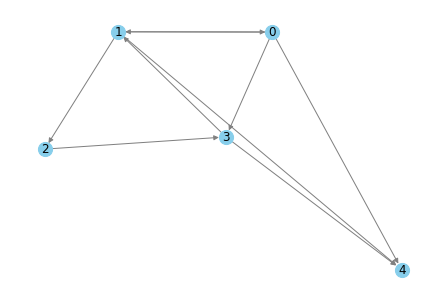

In [17]:
nx.draw_spring(
    G1, with_labels=True, node_color="skyblue", node_size=200, edge_color="grey"
)

The incidence matrix looks differently for directed graph. If and edge is leaving a node it is represented as -1, and if it is incoming to a node it is +1.

In [18]:
nx.linalg.graphmatrix.incidence_matrix(G1, oriented=True).toarray()

array([[-1., -1., -1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0., -1., -1., -1.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0., -1., -1.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -1.]])

In [19]:
nx.linalg.graphmatrix.incidence_matrix(G1, oriented=False).toarray()

array([[1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [20]:
# Adjacency matrix
nx.linalg.graphmatrix.adj_matrix(G1).toarray()

array([[0., 4., 4., 2., 0.],
       [4., 0., 0., 1., 9.],
       [0., 8., 0., 7., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 4., 0., 0.]])